In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rutinas_AutoInt as ru

from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad

In [3]:
import plt_conf as conf
conf.general()  # cargando configuración general

In [4]:
# cargando datos L=0

##### Lamb=0 #####
radSigmMasa = np.load('Datos/fondo_n0/radSigmMasa_n0.npz', allow_pickle=True)
Sig0R99M99EnergyT = np.load('Datos/fondo_n0/Sig0R99M99EnergyT_n0.npz', allow_pickle=True)

##### Lamb=1 #####
radSigmMasaNP1 = np.load('Datos/fondo_n0/radSigmMasa_n0_Pos.npz', allow_pickle=True)
Sig0R99M99EnergyTNP1 = np.load('Datos/fondo_n0/Sig0R99M99EnergyT_n0_Pos.npz', allow_pickle=True)

##### Lamb=-1 #####
radSigmMasaNM1 = np.load('Datos/fondo_n0/radSigmMasa_n0_Neg.npz', allow_pickle=True)
Sig0R99M99EnergyTNM1 = np.load('Datos/fondo_n0/Sig0R99M99EnergyT_n0_Neg.npz', allow_pickle=True)

#### completando
radSigmMasaNM1C = np.load('Datos/fondo_n0/radSigmMasan0M1.npz', allow_pickle=True)
Sig0R99M99EnergyTNM1C = np.load('Datos/fondo_n0/Sig0R99M99EnergyTn0M1.npz', allow_pickle=True)
radSigmMasaNC = np.load('Datos/fondo_n0/radSigmMasan0.npz', allow_pickle=True)
Sig0R99M99EnergyTNC = np.load('Datos/fondo_n0/Sig0R99M99EnergyTn0.npz', allow_pickle=True)

In [5]:
##### L=0 #####
Sig0R99M99Energy = Sig0R99M99EnergyT['arr_0']
radSigmMasa = radSigmMasa['arr_0']

##### L=1 #####
Sig0R99M99EnergyP1 = Sig0R99M99EnergyTNP1['arr_0']
radSigmMasaP1 = radSigmMasaNP1['arr_0']

##### L=-1 #####
Sig0R99M99EnergyM1 = Sig0R99M99EnergyTNM1['arr_0']
radSigmMasaM1 = radSigmMasaNM1['arr_0']

# completando
Sig0R99M99EnergyM1C = Sig0R99M99EnergyTNM1C['arr_0']
radSigmMasaM1C = radSigmMasaNM1C['arr_0']

Sig0R99M99EnergyC = Sig0R99M99EnergyTNC['arr_0']
radSigmMasaC = radSigmMasaNC['arr_0']

In [6]:
solPlot = [[1.0, 26.35148536319269, 1, -1, 0, None, 'DOP853', 1e-13, 1e-15, 0.5667978718259771],
           [1.0, 24.19121506258424, 1, 0, 0, None, 'DOP853', 1e-13, 1e-15, 0.9185797718046369],
           [1.0, 20.933815765586345, 1, 1, 0, None, 'DOP853', 1e-13, 1e-15, 1.4796444065743395]]

In [7]:
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(solPlot[2])

en, Mas, Sig0R99M99EnergyP1[-5, 2], Sig0R99M99EnergyP1[-5, 3]

(-1.4770377163796176,
 6.344028578884178,
 31.327882061658546,
 -9.374837201517902)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_21512/3827273030.py:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


Text(0.5, 35, '$\\sigma_0\\to 0$')

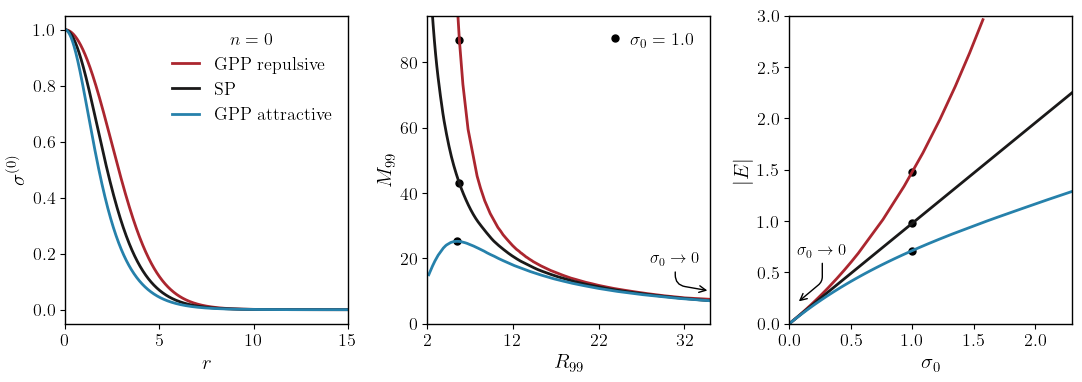

In [8]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']
fac = 4*np.pi

#profilesNumb = len(radSigmMasaN_P)

Ls = ['-', '--', ':', '.-']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

#for i in kval:
i = -5
#ax[0].plot(radSigmMasaP1[i][0], radSigmMasaP1[i][1], color=col[0], label=r'$\sigma_0 = %5.4f$'%radSigmMasaP1[i][1][0])
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(solPlot[2])
ax[0].plot(rD, sD, color=col[3], label=r'GPP repulsive')  # label=r'$\sigma_0 = %5.4f$'%radSigmMasaP1[i][1][0]
ax[1].plot(Sig0R99M99EnergyP1[i, 1], fac*Sig0R99M99EnergyP1[i, 2], ls='', c='k', marker='o', markersize=5, label=r'$\sigma_0 = %2.1f$'%sD[0])
ax[2].plot(sD[0], np.abs(en), ls='', c='k', marker='o', markersize=5)

i = 0 #-7
#ax[0].plot(radSigmMasa[i][0], radSigmMasa[i][1], color=col[2], label=r'$\sigma_0 = %5.4f$'%radSigmMasa[i][1][0])
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(solPlot[1])
ax[0].plot(rD, sD, color=col[0], label=r'SP')  # , label=r'$\sigma_0 = %5.4f$'%radSigmMasa[i][1][0]
ax[1].plot(Sig0R99M99EnergyC[i, 1], fac*Sig0R99M99EnergyC[i, 2], c='k', marker='o', markersize=5)
ax[2].plot(sD[0], np.abs(en), c='k', marker='o', markersize=5)

i = 0 #-8
#ax[0].plot(radSigmMasaM1[i][0], radSigmMasaM1[i][1], color=col[3], label=r'$\sigma_0 = %5.4f$'%radSigmMasaM1[i][1][0])
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(solPlot[0])
ax[0].plot(rD, sD, color=col[2], label=r'GPP attractive')
ax[1].plot(Sig0R99M99EnergyM1C[i, 1], fac*Sig0R99M99EnergyM1C[i, 2], c='k', marker='o', markersize=5)
ax[2].plot(sD[0], np.abs(en), c='k', marker='o', markersize=5)

#########
ax[1].plot(Sig0R99M99EnergyP1[:, 1], fac*Sig0R99M99EnergyP1[:, 2], color=col[3], ls='-')#, label=r'GPP repulsive')

temp1 = np.concatenate((Sig0R99M99Energy[:, 1], Sig0R99M99EnergyC[1:, 1]))
temp2 = np.concatenate((Sig0R99M99Energy[:, 2], Sig0R99M99EnergyC[1:, 2]))
fM = interp1d(temp1, temp2, kind='quadratic')
Rval = np.linspace(temp1[0], temp1[-1], 5000)
ax[1].plot(Rval, fac*fM(Rval), color=col[0], ls='-')#, 
#ax[1].plot(temp1, fac*temp2, color=col[0], ls='-')
#ax[1].plot(Sig0R99M99Energy[:, 1], Sig0R99M99Energy[:, 2], color=col[2], ls='-')#, label=r'SP')

temp1 = np.concatenate((Sig0R99M99EnergyM1[:-1, 1], Sig0R99M99EnergyM1C[1:, 1]))
temp2 = np.concatenate((Sig0R99M99EnergyM1[:-1, 2], Sig0R99M99EnergyM1C[1:, 2]))
ax[1].plot(temp1, fac*temp2, color=col[2], ls='-')
#ax[1].plot(Sig0R99M99EnergyM1[:-1, 1], Sig0R99M99EnergyM1[:-1, 2], color=col[3], ls='-')#, label=r'GPP attractive')

ax[2].plot(Sig0R99M99EnergyP1[:, 0], np.abs(Sig0R99M99EnergyP1[:, 3]), color=col[3], ls='-')
ax[2].plot(Sig0R99M99Energy[:, 0], np.abs(Sig0R99M99Energy[:, 3]), color=col[0], ls='-')

temp1 = np.concatenate((Sig0R99M99EnergyM1[:, 0], Sig0R99M99EnergyM1C[1:, 0]))
temp2 = np.concatenate((Sig0R99M99EnergyM1[:, 3], Sig0R99M99EnergyM1C[1:, 3]))
ax[2].plot(temp1, np.abs(temp2), color=col[2], ls='-')
# ax[2].plot(Sig0R99M99EnergyM1[:, 0], np.abs(Sig0R99M99EnergyM1[:, 3]), color=col[3], ls='-')

ax[0].set_xlim(0, 15)

ax[1].set_xlim(2., 35)
ax[1].set_ylim(0, fac*7.5)
ax[1].set_xticks([2, 12, 22, 32])

ax[2].set_xlim(0.0, 2.3)
ax[2].set_ylim(0, 3)

#ax[1].set_xscale('log')
#ax[1].set_yscale('log')

ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$\sigma^{(0)}$')
#ax[0].set_xlabel(r'$r \,[2mc/(\hbar\Lambda^{1/2})]$')
#ax[0].set_ylabel(r'$\sigma \,[c_2]$')

ax[1].set_xlabel(r'$R_{99}$')
ax[2].set_xlabel(r'$\sigma_0$')
#ax[1].set_xlabel(r'$R_{99}\,[2mc/(\hbar\Lambda^{1/2})]$')
#ax[2].set_xlabel(r'$\sigma_0\,[c_2]$')

ax[1].set_ylabel(r'$M_{99}$')
ax[2].set_ylabel(r'$|E|$')
#ax[1].set_ylabel(r'$M(R_{99})\,[c\hbar/(Gm\Lambda^{1/2})]$')
#ax[2].set_ylabel(r'$|E|\,[2c^2m/\Lambda]$')

#ax[1].axvspan(xmin=-1e-02, xmax=1e-02, ymin=0, ymax=1, color='gray')

ax[1].legend(frameon=False, fontsize=13, handlelength=0.1)
ax[0].legend(loc='upper right', frameon=False, title=r'$n=0$', fontsize=13)

#bbox = dict(boxstyle="round", fc="0.8"), bbox=bbox
#ax[1].annotate("SP", xy=(35, 10), xytext=(-26, 20), textcoords='offset points', arrowprops=dict(arrowstyle="->",
#                                                                   connectionstyle="angle, angleA=90,angleB=0, rad=10"))

#ax[2].annotate("SP", xy=(0.06, 0.2), xytext=(3, 30), textcoords='offset points', arrowprops=dict(arrowstyle="->",
#                                                                   connectionstyle="angle, angleA=-90, angleB=30, rad=5"))

ax[1].annotate(r'$\sigma_0\to 0$', xy=(35, 10), xytext=(-43, 20), fontsize=12, textcoords='offset points', arrowprops=dict(arrowstyle="->",
                                                                   connectionstyle="angle, angleA=90,angleB=-10, rad=10"))

ax[2].annotate(r'$\sigma_0\to 0$', xy=(0.06, 0.2), xytext=(.5, 35), fontsize=12, textcoords='offset points', arrowprops=dict(arrowstyle="->",
                                                                   connectionstyle="angle, angleA=-90, angleB=40, rad=5"))

In [10]:
fig.savefig('Fondo_n0.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [9]:
## Funcional de Energia

In [8]:
dataEnfM1, dataTfM1, dataFfM1 = [], [], []

Lamb = -1  # autointeraccion
for i in radSigmMasaM1: #radSigmMasa, radSigmMasaM1
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    dataEnfM1.append([sig[0], Enf])
    dataTfM1.append([sig[0], Tfval])
    dataFfM1.append([sig[0], Ffval])

dataEnfM1 = np.array(dataEnfM1)
dataTfM1 = np.array(dataTfM1)
dataFfM1 = np.array(dataFfM1)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_21512/1440788999.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


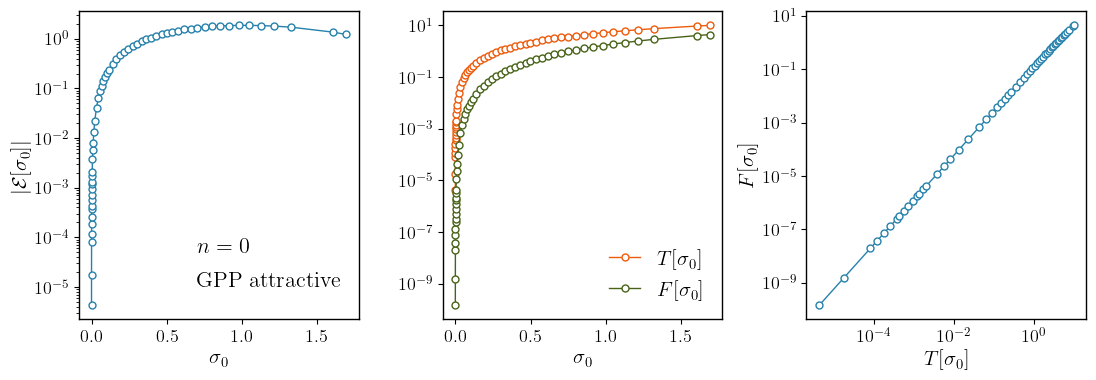

In [10]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.3))


ax[0].plot(dataEnfM1[:-2, 0], np.abs(dataEnfM1[:-2, 1]), ls='-', lw=1, 
           color=col[2], marker='o', markersize=5, mfc='white')
ax[0].text(x=0.7, y=5e-05, s=r'$n=0$')
ax[0].text(x=0.7, y=1e-05, s=r'GPP attractive')#r'$\Lambda=%d$'%Lamb)

ax[1].plot(dataTfM1[:-2, 0], dataTfM1[:-2, 1], ls='-', lw=1, 
           color=col[6], marker='o', markersize=5, mfc='white', label=r'$T[\sigma_0]$')
ax[1].plot(dataFfM1[:-2, 0], dataFfM1[:-2, 1], ls='-', lw=1,
           color=col[5], marker='o', markersize=5, mfc='white', label=r'$F[\sigma_0]$')

ax[2].plot(dataTfM1[:-2, 1], dataFfM1[:-2, 1], c=col[2], ls='-', lw=1, marker='o', markersize=5, mfc='white')

#ax[0].set_ylim(-50, 5)
#ax[0].set_xlim(0, 6)
ax[0].set_yscale('log')

#ax[1].set_ylim(-3, 250)
ax[1].set_yscale('log')

#ax[2].set_ylim(-3, 250)
ax[2].set_xscale('log')
ax[2].set_yscale('log')


ax[0].set_ylabel(r'$|\mathcal{E}[\sigma_0]|$')
ax[0].set_xlabel(r'$\sigma_0$')

ax[1].set_xlabel(r'$\sigma_0$')

ax[2].set_xlabel(r'$T[\sigma_0]$')
ax[2].set_ylabel(r'$F[\sigma_0]$')

ax[1].legend(frameon=False)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_21512/150260664.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


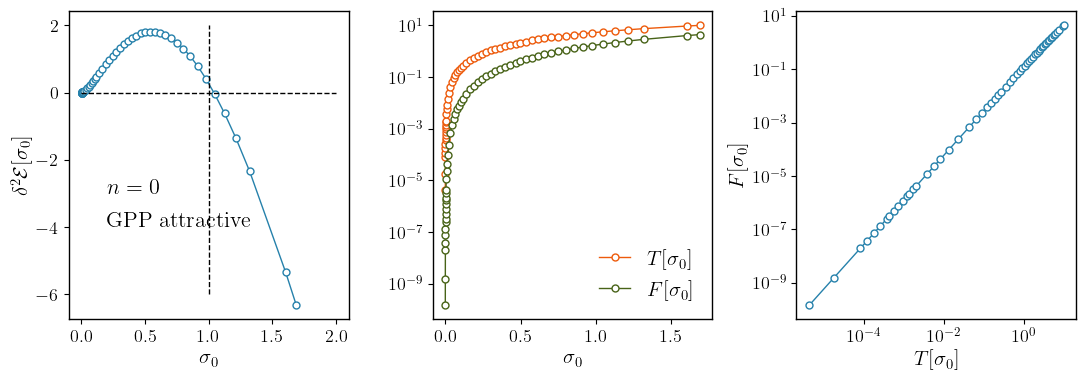

In [11]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.3))


#ax[0].plot(dataEnfM1[:-2, 0], np.abs(dataEnfM1[:-2, 1]), ls='-', lw=1, 
#           color=col[2], marker='o', markersize=5, mfc='white')
ax[0].plot(dataTfM1[:-2, 0], 2*dataTfM1[:-2, 1]-6*dataFfM1[:-2, 1], ls='-', lw=1, 
           color=col[2], marker='o', markersize=5, mfc='white')
ax[0].text(x=0.2, y=-3, s=r'$n=0$')
ax[0].text(x=0.2, y=-4, s=r'GPP attractive')#r'$\Lambda=%d$'%Lamb)

ax[1].plot(dataTfM1[:-2, 0], dataTfM1[:-2, 1], ls='-', lw=1, 
           color=col[6], marker='o', markersize=5, mfc='white', label=r'$T[\sigma_0]$')
ax[1].plot(dataFfM1[:-2, 0], dataFfM1[:-2, 1], ls='-', lw=1,
           color=col[5], marker='o', markersize=5, mfc='white', label=r'$F[\sigma_0]$')

ax[2].plot(dataTfM1[:-2, 1], dataFfM1[:-2, 1], c=col[2], ls='-', lw=1, marker='o', markersize=5, mfc='white')

#ax[0].set_ylim(-50, 5)
#ax[0].set_xlim(0, 6)
#ax[0].set_yscale('log')

#ax[1].set_ylim(-3, 250)
ax[1].set_yscale('log')

#ax[2].set_ylim(-3, 250)
ax[2].set_xscale('log')
ax[2].set_yscale('log')


ax[0].set_ylabel(r'$\delta^2 \mathcal{E}[\sigma_0]$')
ax[0].set_xlabel(r'$\sigma_0$')

ax[1].set_xlabel(r'$\sigma_0$')

ax[2].set_xlabel(r'$T[\sigma_0]$')
ax[2].set_ylabel(r'$F[\sigma_0]$')

ax[0].vlines(x=1, ymin=-6, ymax=2, ls='--', lw=1, color='k')
ax[0].hlines(y=0, xmin=0, xmax=2, ls='--', lw=1, color='k')

ax[1].legend(frameon=False)

In [57]:
np.savetxt('F_G_n0.dat', np.array([dataTfM1[:-2, 0], dataTfM1[:-2, 1], dataFfM1[:-2, 1]]).T)

In [40]:
fig.savefig('d2EreL_n0LambM1.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

1.125027493321192

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_15340/3152971218.py:18: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


Text(0.89, -4.8, '$\\nu=1$')

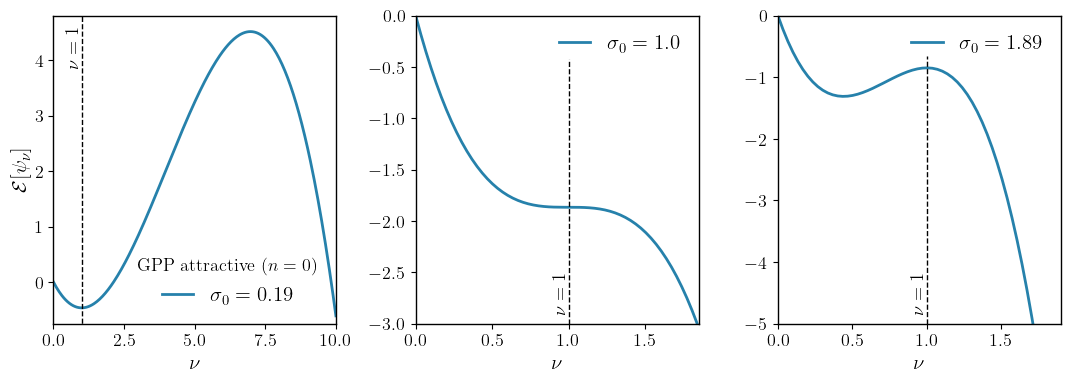

In [17]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']
sigval = np.linspace(0, 10, 300)

sig0, Tval = dataTfM1[-8, 0], dataTfM1[-8, 1] 
sig0, Fval = dataFfM1[-8, 0], dataFfM1[-8, 1] 

sig01, Tval1 = dataTfM1[30, 0], dataTfM1[30, 1] 
sig01, Fval1 = dataFfM1[30, 0], dataFfM1[30, 1] 
sig02, Tval2 = dataTfM1[-2, 0], dataTfM1[-2, 1] #-6
sig02, Fval2 = dataFfM1[-2, 0], dataFfM1[-2, 1] 

Esig = lambda s, Tval, Fval: s**2*Tval-s**3*Fval-s*(2*Tval-3*Fval)
#(Tval*(s-2)-(s**2-3)*Fval)*s

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

ax[0].plot(sigval, Esig(sigval, Tval1, Fval1), ls='-', color=col[2], label=r'$\sigma_0 = %3.2f$'%sig01)
ax[1].plot(sigval, Esig(sigval, Tval, Fval), ls='-', color=col[2], label=r'$\sigma_0 = %3.1f$'%sig0)
ax[2].plot(sigval, Esig(sigval, Tval2, Fval2), ls='-', color=col[2], label=r'$\sigma_0 = %3.2f$'%sig02)

#temp = np.gradient(Esig(sigval, Tval2, Fval2), sigval)
#ax[1].plot(sigval, temp, ls='-', lw=1, color=col[2], label=r'$\sigma_0 = %3.2f$'%sig02)

#ax[1].plot(dataTfM1[:-2, 0], dataTfM1[:-2, 1], ls='-', lw=1, 
#           color=col[6], marker='o', markersize=5, mfc='white', label=r'$T[\sigma_0]$')
#ax[1].plot(dataFfM1[:-2, 0], dataFfM1[:-2, 1], ls='-', lw=1,
#           color=col[5], marker='o', markersize=5, mfc='white', label=r'$F[\sigma_0]$')

ax[0].set_ylabel(r'$\mathcal{E}[\psi_{\nu}]$')
ax[0].set_xlabel(r'$\nu$')
ax[0].set_xlim(0, 10.02)
ax[0].set_ylim(-0.75, 4.8)

ax[1].set_xlabel(r'$\nu$')
ax[1].set_xlim(0, 1.85)
ax[1].set_ylim(-3, 0)

ax[2].set_xlabel(r'$\nu$')
ax[2].set_xlim(0, 1.9)
ax[2].set_ylim(-5, 0)

ax[0].legend(frameon=False, title=r'GPP attractive ($n=0$)')
ax[1].legend(frameon=False)  # , title=r'GPP attractive ($n=0$)'
ax[2].legend(frameon=False)  #, title=r'GPP attractive ($n=0$)'

ax[0].vlines(x=1, ymin=-1, ymax=5, lw=1, ls='--', color='k')
ax[1].vlines(x=1, ymin=-15, ymax=-0.42, lw=1, ls='--', color='k')
ax[2].vlines(x=1, ymin=-5, ymax=-0.65, lw=1, ls='--', color='k')

ax[0].text(x=0.4, y=3.9, s=r'$\nu=1$', rotation='vertical', fontsize='small')
ax[1].text(x=0.89, y=-2.88, s=r'$\nu=1$', rotation='vertical', fontsize='small')
ax[2].text(x=0.89, y=-4.8, s=r'$\nu=1$', rotation='vertical', fontsize='small')

In [18]:
fig.savefig('Enu_n0LambM1.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [19]:
#cargando
s0, T0, F0 = np.loadtxt('F_G_n0.dat', unpack=True)
s1, T1, F1 = np.loadtxt('F_G_n1.dat', unpack=True)
s2, T2, F2 = np.loadtxt('F_G_n2.dat', unpack=True)
#np.savetxt('F_G_n0.dat', np.array([dataTfM1[:-2, 0], dataTfM1[:-2, 1], dataFfM1[:-2, 1]]).T)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_15340/1590168055.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


Text(0.28, -2.8, 'unstable')

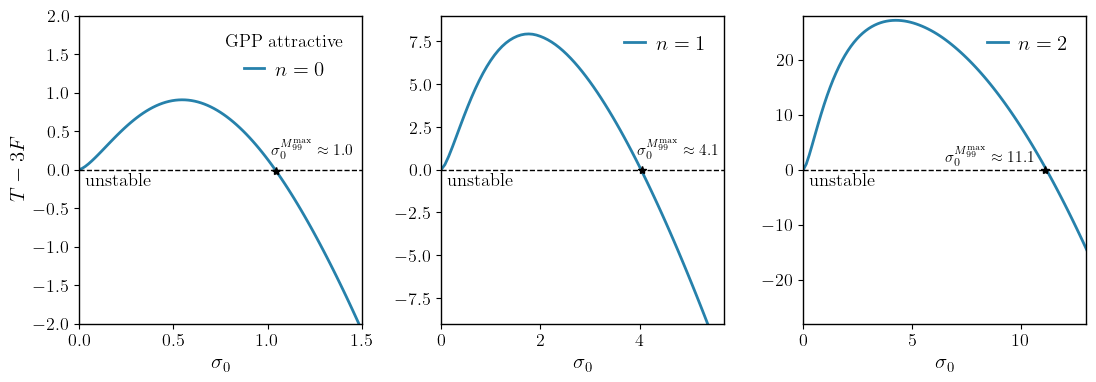

In [22]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

s0_val = np.linspace(s0[0], s0[-1], 100)
f0 = interp1d(s0, T0-3*F0, kind='quadratic')
#ax[0].plot(s0, T0-3*F0, ls='-', lw=1, color=col[2], marker='o', markersize=3, mfc='white', label=r'$n=0$')
ax[0].plot(s0_val, f0(s0_val), ls='-', color=col[2], label=r'$n=0$')

s1_val = np.linspace(s1[0], s1[-1], 100)
f1 = interp1d(s1, T1-3*F1, kind='quadratic')
#ax[1].plot(s1, T1-3*F1, ls='-', lw=1, color=col[2], marker='o', markersize=3, mfc='white', label=r'$n=1$')
ax[1].plot(s1_val, f1(s1_val), ls='-', color=col[2], label=r'$n=1$')

s2_val = np.linspace(s2[0], s2[-1], 100)
f2 = interp1d(s2, T2-3*F2, kind='quadratic')
#ax[2].plot(s2, T2-3*F2, ls='-', lw=1, color=col[2], marker='o', markersize=3, mfc='white', label=r'$n=2$')
ax[2].plot(s2_val, f2(s2_val), ls='-', color=col[2], label=r'$n=2$')

ax[0].set_ylabel(r'$T-3F$')
ax[0].set_xlabel(r'$\sigma_0$')

#ax[1].set_ylabel(r'$T-3F$')
ax[1].set_xlabel(r'$\sigma_0$')

#ax[2].set_ylabel(r'$T-3F$')
ax[2].set_xlabel(r'$\sigma_0$')

ax[0].hlines(y=0, xmin=0, xmax=20, ls='--', lw=1, color='k')
ax[1].hlines(y=0, xmin=0, xmax=20, ls='--', lw=1, color='k')
ax[2].hlines(y=0, xmin=0, xmax=20, ls='--', lw=1, color='k')


ax[0].set_xlim(0, 1.5)
ax[0].set_ylim(-2, 2)

ax[1].set_xlim(0, 5.7)
ax[1].set_ylim(-9, 9)

ax[2].set_xlim(0, 13)
ax[2].set_ylim(-28, 28)

ax[0].legend(loc='upper right', frameon=False, title=r'GPP attractive', handlelength=1, handletextpad=0.5)
ax[1].legend(loc='upper right', frameon=False, handlelength=1, handletextpad=0.5)  # , title=r'GPP attractive'
ax[2].legend(loc='upper right', frameon=False, handlelength=1, handletextpad=0.5)  # , title=r'GPP attractive'

ax[0].plot(s0[-6], T0[-6]-3*F0[-6], marker='*', markersize=6, c='k')
ax[1].plot([4.05], [0], marker='*', markersize=6, c='k')
ax[2].plot([11.1], [0], marker='*', markersize=6, c='k')

ax[0].text(1.02, 0.2, s=r'$\sigma_0^{M^{\mathrm{max}}_{99}}\approx1.0$', rotation='horizontal', fontsize=11)
ax[1].text(3.95, 0.9, s=r'$\sigma_0^{M^{\mathrm{max}}_{99}}\approx4.1$', rotation='horizontal', fontsize=11)
ax[2].text(6.5, 1.5, s=r'$\sigma_0^{M^{\mathrm{max}}_{99}}\approx11.1$', rotation='horizontal', fontsize=11)

#ax[0].axhspan(-2.07, 0, facecolor='#c72b0c', alpha=0.75)
#ax[1].axhspan(-10, 0, facecolor='#c72b0c', alpha=0.75)
#ax[2].axhspan(-28, 0, facecolor='#c72b0c', alpha=0.75)

#ax[0].text(0.4, -1.2, s=r'Unstable Band', rotation='horizontal')#, fontsize='small'
#ax[1].text(1.7, -5.1, s=r'Unstable Band', rotation='horizontal')#, fontsize='small'
#ax[2].text(4, -16, s=r'Unstable Band', rotation='horizontal')#, fontsize='small'

#ax[0].text(0.4, -1.2, s=r'Unstable Region', rotation='horizontal')#, fontsize='small'
#ax[1].text(1.6, -5.1, s=r'Unstable Region', rotation='horizontal')#, fontsize='small'
#ax[2].text(3.8, -16, s=r'Unstable Region', rotation='horizontal')#, fontsize='small'

ax[0].text(0.035, -0.2, s=r'unstable', rotation='horizontal', fontsize='small')#, fontsize='small'
ax[1].text(0.12, -0.9, s=r'unstable', rotation='horizontal', fontsize='small')#, fontsize='small'
ax[2].text(0.28, -2.8, s=r'unstable', rotation='horizontal', fontsize='small')#, fontsize='small'

In [23]:
fig.savefig('2d2EreL_n0LambM1.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [12]:
dataEnfP1, dataTfP1, dataFfP1 = [], [], []

Lamb = 1  # autointeraccion
for i in radSigmMasaP1: #radSigmMasa, radSigmMasaM1
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    dataEnfP1.append([sig[0], Enf])
    dataTfP1.append([sig[0], Tfval])
    dataFfP1.append([sig[0], Ffval])

dataEnfP1 = np.array(dataEnfP1)
dataTfP1 = np.array(dataTfP1)
dataFfP1 = np.array(dataFfP1)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_31547/1141984789.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


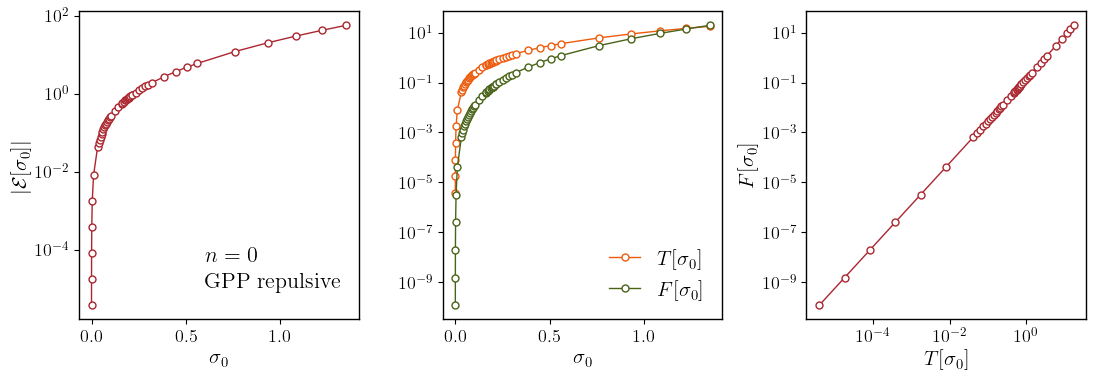

In [14]:
col =  ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.3))


ax[0].plot(dataEnfP1[:-2, 0], np.abs(dataEnfP1[:-2, 1]), ls='-', lw=1, marker='o', markersize=5, color=col[3], mfc='white')
ax[0].text(x=0.6, y=5e-05, s=r'$n=0$')
ax[0].text(x=0.6, y=1e-05, s=r'GPP repulsive') #s=r'$\Lambda=%d$'%Lamb)

ax[1].plot(dataTfP1[:-2, 0], dataTfP1[:-2, 1], c=col[6], ls='-', lw=1, marker='o', markersize=5, mfc='white', label=r'$T[\sigma_0]$')
ax[1].plot(dataFfP1[:-2, 0], dataFfP1[:-2, 1], c=col[5], ls='-', lw=1, marker='o', markersize=5, mfc='white', label=r'$F[\sigma_0]$')

ax[2].plot(dataTfP1[:-2, 1], dataFfP1[:-2, 1], c=col[3], ls='-', lw=1, marker='o', markersize=5,mfc='white')

#ax[0].set_ylim(-50, 5)
#ax[0].set_xlim(0, 6)
ax[0].set_yscale('log')

#ax[1].set_ylim(-3, 250)
ax[1].set_yscale('log')

#ax[2].set_ylim(-3, 250)
ax[2].set_xscale('log')
ax[2].set_yscale('log')


ax[0].set_ylabel(r'$|\mathcal{E}[\sigma_0]|$')
ax[0].set_xlabel(r'$\sigma_0$')

ax[1].set_xlabel(r'$\sigma_0$')

ax[2].set_xlabel(r'$T[\sigma_0]$')
ax[2].set_ylabel(r'$F[\sigma_0]$')

ax[1].legend(frameon=False)

In [45]:
fig.savefig('EreL_n0LambP1.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [ ]:
## Autovalores 

In [6]:
# cargando datos L=0
# [dato1, dato2, ...]  -> dato = [s0, AutoVal, AutoVec] -> AutoVal = [a1, a2, ...], AutoVec -> [[vec1], [vec2]]

##### Lamb=0 #####
datan0 = np.load('AutovaloresSep/ReEing_n0_L0.npy', allow_pickle=True)
dataIn = np.loadtxt('Datos/espectro_n0/Data_0.dat', unpack=True)

##### Lamb=1 #####
datan0P = np.load('AutovaloresSep/ReEingP_n0_L0.npy', allow_pickle=True)
dataInP1 = np.loadtxt('Datos/espectro_n0P/Data_1.dat', unpack=True)

##### Lamb=-1 #####
datan0M = np.load('AutovaloresSep/ReEingM_n0_L0.npy', allow_pickle=True)
dataInM1 = np.loadtxt('Datos/espectro_n0N/Data_-1.dat', unpack=True)

In [7]:
dats0, datEing, dataEingVect = ru.DatSepara(datan0)
dats0M, datEingM, dataEingVectM = ru.DatSepara(datan0M)
dats0P, datEingP, dataEingVectP = ru.DatSepara(datan0P)

In [11]:
Autovalores2, AutoVectNot = ru.choosing(datEing, dataEingVect, dataIn, Rtol=3e-04, Atol=3e-04, NoTriv=False)
Autovalores2M, AutoVectNotM = ru.choosing(datEingM[:-2], dataEingVectM[:-2], dataInM1[:-2], Rtol=8e-03, Atol=8e-03, NoTriv=False)
Autovalores2P, AutoVectNotP = ru.choosing(datEingP, dataEingVectP, dataInP1, Rtol=8e-03, Atol=8e-03, NoTriv=False)

In [15]:
np.save('AutovN0.npy', np.array([dats0, Autovalores2], dtype=object))
np.save('AutovN0M.npy', np.array([dats0M, Autovalores2M], dtype=object))
np.save('AutovN0P.npy', np.array([dats0P, Autovalores2P], dtype=object))

In [16]:
len(dats0M), len(Autovalores2M)

(59, 57)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_4143/2129044969.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),


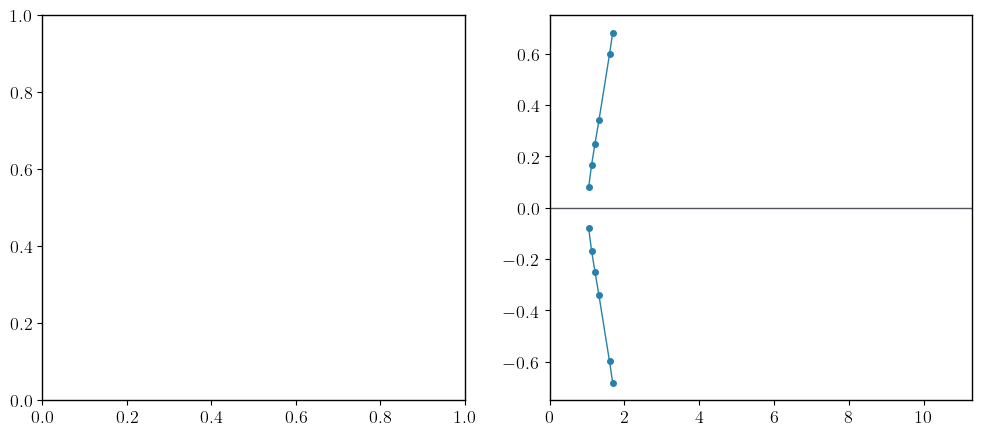

In [29]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.2))

datp1, datp2 = [], []
Mdatp1, Mdatp2 = [], []
ncasos = len(dats0)
for i in range(ncasos):
    y = Autovalores2[i]
    x = dats0[i]
    #
    temp = ru.roundElem(y)
    if temp is not None:
        if len(temp[0])>1:
            t1, t2 = temp[0]
            i1, i2 = temp[1]
            datp1.append([x, t1, i1])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, -t1, i1])
            Mdatp2.append([x, -t2, i2])
        elif len(temp[0])==1:
            t2, = temp[0]
            i2, = temp[1]
            datp1.append([x, None, None])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, None, None])
            Mdatp2.append([x, -t2, i2])
    else:
        datp1.append([x, None, None])
        datp2.append([x, None, None])
        Mdatp1.append([x, None, None])
        Mdatp2.append([x, None, None])
    
    if temp is not None:
        if len(temp[0])>1:
            ax[1].plot(x, t1, x, -t1, ls='', color=col[0], marker='o', markersize=4, alpha=0.5)
            ax[1].plot(x, t2, x, -t2, ls='', color=col[0], marker='o', markersize=4)
        elif len(temp[0])==1:
            ax[1].plot(x, t2, x, -t2, ls='', color=col[0], marker='o', markersize=4)

    #ax[1].plot([x]*naut, y, ls='', color=col[3], marker='o', markersize=4)

datp1 = np.array(datp1)
datp2 = np.array(datp2)
Mdatp1 = np.array(Mdatp1)
Mdatp2 = np.array(Mdatp2)
ax[1].plot(datp1[:, 0], datp1[:, 1], lw=1, color=col[0], alpha=0.5)
ax[1].plot(datp2[:, 0], datp2[:, 1], lw=1, color=col[0])
ax[1].plot(Mdatp1[:, 0], Mdatp1[:, 1], lw=1, color=col[0], alpha=0.5)
ax[1].plot(Mdatp2[:, 0], Mdatp2[:, 1], lw=1, color=col[0])

####
datp1, datp2 = [], []
Mdatp1, Mdatp2 = [], []
ncasos = len(dats0P)
for i in range(ncasos):
    y = Autovalores2P[i]
    x = dats0P[i]
    #
    temp = ru.roundElem(y)
    if temp is not None:
        if len(temp[0])>1:
            t1, t2 = temp[0]
            i1, i2 = temp[1]
            datp1.append([x, t1, i1])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, -t1, i1])
            Mdatp2.append([x, -t2, i2])
        elif len(temp[0])==1:
            t2, = temp[0]
            i2, = temp[1]
            datp1.append([x, None, None])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, None, None])
            Mdatp2.append([x, -t2, i2])
    else:
        datp1.append([x, None, None])
        datp2.append([x, None, None])
        Mdatp1.append([x, None, None])
        Mdatp2.append([x, None, None])
    
    if temp is not None:
        if len(temp[0])>1:
            ax[1].plot(x, t1, x, -t1, ls='', color=col[3], marker='o', markersize=4, alpha=0.5)
            ax[1].plot(x, t2, x, -t2, ls='', color=col[3], marker='o', markersize=4)
        elif len(temp[0])==1:
            ax[1].plot(x, t2, x, -t2, ls='', color=col[3], marker='o', markersize=4)

    #ax[1].plot([x]*naut, y, ls='', color=col[3], marker='o', markersize=4)

datp1 = np.array(datp1)
datp2 = np.array(datp2)
Mdatp1 = np.array(Mdatp1)
Mdatp2 = np.array(Mdatp2)
ax[1].plot(datp1[:, 0], datp1[:, 1], lw=1, color=col[3], alpha=0.5)
ax[1].plot(datp2[:, 0], datp2[:, 1], lw=1, color=col[3])
ax[1].plot(Mdatp1[:, 0], Mdatp1[:, 1], lw=1, color=col[3], alpha=0.5)
ax[1].plot(Mdatp2[:, 0], Mdatp2[:, 1], lw=1, color=col[3])

#####

datp1, datp2 = [], []
Mdatp1, Mdatp2 = [], []
ncasos = len(dats0M[:-2])
for i in range(ncasos):
    y = Autovalores2M[i]
    x = dats0M[i]
    #
    temp = ru.roundElem(y, dec=8)
    if temp is not None:
        if len(temp[0])>1 and len(temp[0])<3:
            t1, t2 = temp[0]
            i1, i2 = temp[1]
            datp1.append([x, t1, i1])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, -t1, i1])
            Mdatp2.append([x, -t2, i2])
        elif len(temp[0])==1:
            t2, = temp[0]
            i2, = temp[1]
            datp1.append([x, None, None])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, None, None])
            Mdatp2.append([x, -t2, i2])
    else:
        datp1.append([x, None, None])
        datp2.append([x, None, None])
        Mdatp1.append([x, None, None])
        Mdatp2.append([x, None, None])
    
    if temp is not None:
        if len(temp[0])>1:
            ax[1].plot(x, t1, x, -t1, ls='', color=col[2], marker='o', markersize=4, alpha=0.5)
            ax[1].plot(x, t2, x, -t2, ls='', color=col[2], marker='o', markersize=4)
        elif len(temp[0])==1:
            ax[1].plot(x, t2, x, -t2, ls='', color=col[2], marker='o', markersize=4)

    #ax[1].plot([x]*naut, y, ls='', color=col[3], marker='o', markersize=4)

datp1 = np.array(datp1)
datp2 = np.array(datp2)
Mdatp1 = np.array(Mdatp1)
Mdatp2 = np.array(Mdatp2)
ax[1].plot(datp1[:, 0], datp1[:, 1], lw=1, color=col[2], alpha=0.5)
ax[1].plot(datp2[:, 0], datp2[:, 1], lw=1, color=col[2])
ax[1].plot(Mdatp1[:, 0], Mdatp1[:, 1], lw=1, color=col[2], alpha=0.5)
ax[1].plot(Mdatp2[:, 0], Mdatp2[:, 1], lw=1, color=col[2])


######

#plt.yscale('log')
ax[1].set_xlim(0, 11.3)
#ax[1].set_ylim(-.5, .5)

ax[1].hlines(y=0, xmin=0, xmax=11.5, ls='-', lw=1, color='#55555e')

In [118]:
#######
dataIndic = dataInM1 
Auto_Funciones = dataEingVectM
Auto_Valores = datEingM
#######

k = 51 # configuración fondo
autoV = 1

print('Sigma0 = ', dataIndic[k][0], 'Autovalores \n', Auto_Valores[k])
print('')

s0, rMax, Nptos = dataIndic[k]
Nptos = int(Nptos)

utilez = [k, Nptos, rMax]
r_dis, datA, datB = ru.VectoresAB(autoV, Auto_Funciones, Auto_Valores, utilez)

Sigma0 =  1.0468827979700295 Autovalores 
 [-0.07965931+4.78994969e-13j  0.07965931+4.78994969e-13j]

3612 1806 1806 1806
Autovalor estudiado  (0.07965930610144706+4.789949693692461e-13j)


/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_15948/1810931615.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4.),
/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_15948/1810931615.py:75: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax1 = fig.add_axes([left, bottom, width, height])


Text(0.5, 0, '$r$')

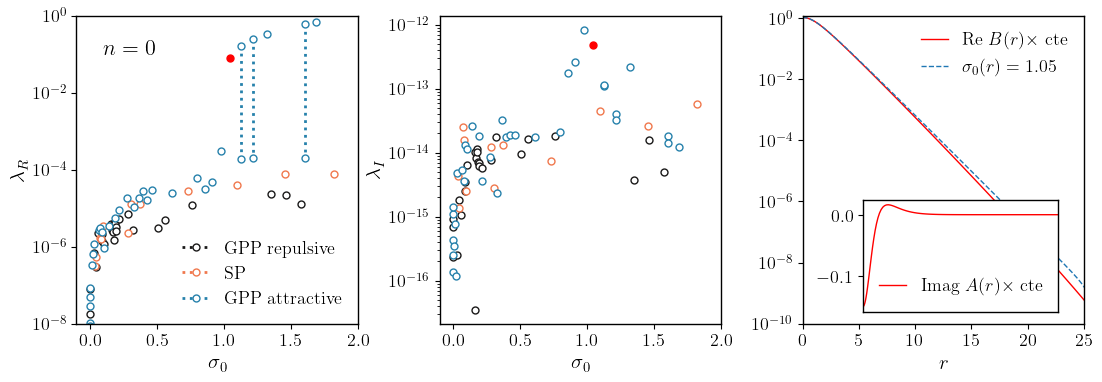

In [153]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.29))


######## Lambda = 1 ###########
num = len(datEingP)
datmenor, datamayor = [], []
for i in range(num):
    x = dats0P[i]
    yR = np.abs(np.real(datEingP[i]))
    yI = np.abs(np.imag(datEingP[i]))
    mul = len(yR)
    
    if mul>0:
        YR = list(set(yR))
        YI = list(set(yI))
        MUL = len(YR)
        
        ax[0].plot([x]*MUL, YR, ls=':', marker='o', markersize=5, c=col[0], mfc='white')
        ax[1].plot([x]*MUL, YI, ls=':', marker='o', markersize=5, c=col[0], mfc='white')

ax[0].plot([], [], ls=':', marker='o', markersize=5, c=col[0], mfc='white', label=r'GPP repulsive')
ax[1].plot([], [], ls=':', marker='o', markersize=5, c=col[0], mfc='white', label=r'GPP repulsive')

######## Lambda = 0 ###########
num = len(datEing)
datmenor, datamayor = [], []
for i in range(num):
    x = dats0[i]
    yR = np.abs(np.real(datEing[i]))
    yI = np.abs(np.imag(datEing[i]))
    mul = len(yR)
    
    if mul>0:
        YR = list(set(yR))
        YI = list(set(yI))
        MUL = len(YR)
        
        ax[0].plot([x]*MUL, YR, ls=':', marker='o', markersize=5, c=col[1], mfc='white')
        ax[1].plot([x]*MUL, YI, ls=':', marker='o', markersize=5, c=col[1], mfc='white')


ax[0].plot([], [], ls=':', marker='o', markersize=5, c=col[1], mfc='white', label=r'SP')
ax[1].plot([], [], ls=':', marker='o', markersize=5, c=col[1], mfc='white', label=r'SP')

######## Lambda = -1 ###########
num = len(datEingM)
datmenor, datamayor = [], []
for i in range(num-2):
    x = dats0M[i]
    yR = np.abs(np.real(datEingM[i]))
    yI = np.abs(np.imag(datEingM[i]))
    mul = len(yR)

    if x == dataIndic[k][0]:
        if mul>0:
            YR = list(set(yR))
            YI = list(set(yI))
            MUL = len(YR)
        
            ax[0].plot([x]*MUL, YR, ls=':', marker='o', markersize=5, c='red')
            ax[1].plot([x]*MUL, YI, ls=':', marker='o', markersize=5, c='red')
        

        cte = x/np.abs(datB[0]).max()
        ax[2].plot(r_dis[1:-1], np.real(datB[0])*cte, ls='-', lw=1, c='red', label=r'Re $B(r)\times$ cte')
        ax[2].plot(radSigmMasaM1[k][0], radSigmMasaM1[k][1], ls='--', lw=1,
                   label=r'$\sigma_0(r) = %3.2f$'%radSigmMasaM1[k][1][0])
        
        left, bottom, width, height = [0.73, 0.14, 0.15, 0.28]
        ax1 = fig.add_axes([left, bottom, width, height])
        ax1.plot(r_dis[1:-1], np.imag(datA[0])*cte, ls='-', lw=1, c='red', label=r'Imag $A(r)\times$ cte')
        ax1.set_xlim(0, 25)
        ax1.set_xticks([])
        ax1.legend(loc='best', frameon=False, fontsize=13)
    else:
        if mul>0:
            YR = list(set(yR))
            YI = list(set(yI))
            MUL = len(YR)
        
            ax[0].plot([x]*MUL, YR, ls=':', marker='o', markersize=5, c=col[2], mfc='white')
            ax[1].plot([x]*MUL, YI, ls=':', marker='o', markersize=5, c=col[2], mfc='white')

ax[0].plot([], [], ls=':', marker='o', markersize=5, c=col[2], mfc='white', label=r'GPP attractive')
ax[1].plot([], [], ls=':', marker='o', markersize=5, c=col[2], mfc='white', label=r'GPP attractive')

########

ax[0].set_yscale('log')
ax[0].set_xlim(-0.1, 2)
ax[0].set_ylim(1e-08, 1)

ax[0].set_ylabel(r'$\lambda_{R}$')
ax[0].set_xlabel(r'$\sigma_0$')

ax[0].legend(loc='lower right', frameon=False, fontsize=13)
ax[0].text(x=0.1, y=1e-01, s='$n=0$')


ax[1].set_yscale('log')
ax[1].set_xlim(-0.1, 2)
#ax[1].set_ylim(1e-08, 1)
ax[1].set_ylabel(r'$\lambda_{I}$')
ax[1].set_xlabel(r'$\sigma_0$')

ax[2].set_xlim(0, 25)
ax[2].set_ylim(1e-10, 1.2)
ax[2].set_yscale('log')
ax[2].legend(loc='best', frameon=False, fontsize=13)

ax[2].set_xlabel(r'$r$')

In [1]:
def NpuntosCho(s0, rMax):
  if s0>=3.5:
    Nptos = int(rMax/2)
  elif s0>=2.5:
    Nptos = int(rMax/4)
  elif s0>=1.5:
    Nptos = int(rMax/5)
  elif s0>=0.5:
    Nptos = int(rMax/6)
  elif s0>=0.05:
    Nptos = int(rMax/7)
  else:
    Nptos = int(rMax/8)
  return Nptos

def fondo(soluciones_Fondo, rtake = -160):
    #### Fondo ######
    s0 = soluciones_Fondo[0]
    r0M = soluciones_Fondo[1]
    Ext = (s0*r0M)+7000
    Np = int(Ext/2)

    # Resolviendo
    en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(soluciones_Fondo) 
    # Extendiendo
    rDnew, sDnew, dsDnew, uDnew, duDnew, datosEquiv = ru.extend(rD[:rtake], sD[:rtake], dsD[:rtake], uD[:rtake], duD[:rtake],
                                                                Ext, Np, inf=False)

    # interpolación de los datos
    fsN = interp1d(rDnew, sDnew, kind='quadratic') # quadratic
    fdsN = interp1d(rDnew, dsDnew, kind='linear')
    fuN = interp1d(rDnew, uDnew, kind='quadratic')
    fduN = interp1d(rDnew, duDnew, kind='quadratic')
    return  fsN, fdsN, fuN, fduN, rDnew[-1]

def convergInd(soluciones_Fondo, rangoN=None, rangoRmax=None, L=0, rtake = -160):
    
    fsN, fdsN, fuN, fduN, rfin = fondo(soluciones_Fondo, rtake = rtake)  # fondo

    dist = [0.7, 0.8, 0.9, 1]
    ptosVal = [100, 250, 500, 750, 1000]
    
    _, alpha, Lamb, nodos = soluciones_Fondo[1], soluciones_Fondo[2], soluciones_Fondo[3], soluciones_Fondo[4]

    Auto_Real = []
    s0 = fsN(0)
    datFunc = [fsN, fuN]
    if rangoN==None:
      for rMax in rangoRmax:
        Nptos = NpuntosCho(s0, rMax)+ptosVal[3]
        print('Variando rMax', rMax, Nptos)
        util = [Nptos, rMax, Lamb, alpha, L]    
        
        lambd, _, _, _ = ru.espectroL(datFunc, util, inf=False)
        ind = np.real(lambd)!=0
        lambdR = lambd[ind]
        Auto_Real.append([rMax, lambdR, Nptos])
    elif rangoRmax==None:
      for Nptos in rangoN:
        rMax = dist[2]*rfin
        print('Variando Nptos', rMax, Nptos)
        util = [Nptos, rMax, Lamb, alpha, L]   

        lambd, _, _, _ = ru.espectroL(datFunc, util, inf=False)
        ind = np.real(lambd)!=0
        lambdR = lambd[ind]
        Auto_Real.append([rMax, lambdR, Nptos]) 

    return Auto_Real

In [ ]:
[0.9770664302799328, 26.724901684996798, 1, -1, 0, None, 'DOP853', 1e-13, 1e-15, 0.56]
[1.0468827979700295, 26.486638267487766, 1, -1, 0, None, 'DOP853', 1e-13, 1e-15, 0.58]
[1.125027493321192, 25.230305273370362, 1, -1, 0, None, 'DOP853', 1e-13, 1e-15, 0.6]
[1.214673399164205, 24.933575072563286, 1, -1, 0, None, 'DOP853', 1e-13, 1e-15, 0.62]

In [18]:
soluciones_Fondo = [1.125027493321192, 25.230305273370362, 1, -1, 0, None, 'DOP853', 1e-13, 1e-15, 0.6]
#[1.0468827979700295, 26.486638267487766, 1, -1, 0, None, 'DOP853', 1e-13, 1e-15, 0.58]
#[250, 500, 750, 1000, 1250, 1500, 1750, 2000]
Auto_Real = convergInd(soluciones_Fondo, rangoN=[2250], rangoRmax=None, L=0, rtake = -160)

Variando Nptos 6346.436092408674 2250


In [19]:
Auto_Real

[[6346.436092408674,
  array([-1.67478913e-01-2.79959642e-11j, -7.20242264e-05+2.77578275e-11j,
          7.20242264e-05+2.77578275e-11j,  1.67478913e-01-2.79959642e-11j]),
  2250]]

In [ ]:
(0.07965930610144706+4.789949693692461e-13j)

In [ ]:
# 0.9770664302799328
[[6345.628059877475, [-0.11681234+0.07376455j, -0.11681234-0.07376455j, 0.11681234-0.07376455j,  0.11681234+0.07376455j], 250],
 [6345.628059877475, [], 500],
 [6345.628059877475, [], 750],
 [6345.628059877475, [], 1000],
 [6345.628059877475, [-0.00048018-7.60436394e-13j,  0.00048018-7.60436394e-13j], 1250],
 [6345.628059877475, [], 1500],
 [6345.628059877475, [-0.00020233-1.63262177e-11j,  0.00020233-1.63262177e-11j], 1750],
 [6345.628059877475, [-0.00028319+4.69687689e-11j,  0.00028319+4.69687689e-11j], 2000]]

# 1.0468827979700295,
[[6346.885547869963, [-0.1574129-0.08953322j, -0.1574129+0.08953322j, 0.1574129+0.08953322j,  0.1574129-0.08953322j], 250],
 [6346.885547869963, [-0.07943877-6.55823215e-13j, -0.00633368+6.51621986e-13j, 0.00633368+6.51621986e-13j,  0.07943877-6.55823215e-13j], 500],
 [6346.885547869963, [-0.07966114-2.8086882e-13j,  0.07966114-2.8086882e-13j], 750],
 [6346.885547869963, [-0.07966133+1.26018597e-12j,  0.07966133+1.26018597e-12j], 1000],
 [6346.885547869963, [-0.0796593+2.12496606e-13j,  0.0796593+2.12496606e-13j], 1250],
 [6346.885547869963, [-0.0796612+6.44018826e-12j,  0.0796612+6.44018826e-12j], 1500],
 [6346.885547869963, [-0.07966088+1.32698157e-11j,  0.07966088+1.32698157e-11j], 1750],
 [6346.885547869963, [-0.07966013+6.43291977e-11j,  0.07966013+6.43291977e-11j], 2000]]

# 1.125027493321192
[[6346.436092408674, [-0.19373032-0.11327643j, -0.19373032+0.11327643j, 0.19373032+0.11327643j,  0.19373032-0.11327643j], 250],
 [6346.436092408674, [-0.16743956-1.30446869e-13j, -0.00417628+1.21902108e-13j, 0.00417628+1.21902108e-13j, 0.16743956-1.30446869e-13j], 500],
 [6346.436092408674, [-0.16747841+7.65583343e-14j, -0.00040923-7.30384061e-14j, 0.00040923-7.30384061e-14j,  0.16747841+7.65583343e-14j], 750],
 [6346.436092408674, [-0.16747893+2.67611902e-13j,  0.16747893+2.67611902e-13j], 1000],
 [6346.436092408674, [-0.16747864+3.85145678e-13j, -0.00029276-3.36732394e-13j, 0.00029276-3.36732394e-13j,  0.16747864+3.85145678e-13j], 1250],
 [6346.436092408674, [-0.16747874+3.04767331e-12j, -0.00023709-2.74736385e-12j, 0.00023709-2.74736385e-12j,  0.16747874+3.04767331e-12j], 1500],
 [6346.436092408674, [-0.16747871-7.02521366e-12j, -0.00026315+6.79284780e-12j, 0.00026315+6.79284780e-12j,  0.16747871-7.02521366e-12j], 1750],
 [6346.436092408674, [-0.16747908+2.05218621e-11j,  0.16747908+2.05218621e-11j], 2000],
 [6346.436092408674, [-1.67478913e-01-2.79959642e-11j, -7.20242264e-05+2.77578275e-11j, 7.20242264e-05+2.77578275e-11j, 1.67478913e-01-2.79959642e-11j], 2250]]

 #1.214673399164205
 [[6347.901637450386, [-0.22698744-0.14789752j, -0.22698744+0.14789752j,  0.22698744+0.14789752j,  0.22698744-0.14789752j], 250],
 [6347.901637450386, [-0.24828671+4.69242662e-14j, -0.00364769-4.92415211e-14j, 0.00364769-4.92415211e-14j,  0.24828671+4.69242662e-14j], 500],
 [6347.901637450386, [-2.48331395e-01-1.34233770e-13j, -1.64702515e-04+1.36852636e-13j, 1.64702515e-04+1.36852636e-13j,  2.48331395e-01-1.34233770e-13j], 750],
 [6347.901637450386, [-2.48331497e-01+5.72044365e-13j, -1.45995398e-04-5.02847986e-13j, 1.45995398e-04-5.02847986e-13j, 2.48331497e-01+5.72044365e-13j], 1000],
 [6347.901637450386, [-0.24833136+7.02456756e-14j, -0.00028146-1.41633677e-14j, 0.00028146-1.41633677e-14j,  0.24833136+7.02456756e-14j], 1250],
 [6347.901637450386, [-2.48331431e-01+1.03106542e-12j, -1.98749962e-04-6.38184992e-13j, 1.98749962e-04-6.38184992e-13j,  2.48331431e-01+1.03106542e-12j], 1500],
 [6347.901637450386, [-0.24833138-4.71352483e-12j, -0.00025354+4.12964307e-12j, 0.00025354+4.12964307e-12j,  0.24833138-4.71352483e-12j], 1750],
 [6347.901637450386, [-0.24833156+1.14257041e-11j,  0.24833156+1.14257041e-11j], 2000]]